# Delhi Metro Data Analysis methods

In this project, the Delhi Metro lines are analyzed utilizing data visualization techniques. The analysis commences with the visualization of metro station locations on a map, providing insights into the geographical distribution of stations across Delhi. Subsequently, the growth of the Delhi Metro network over time is examined. Furthermore, an analysis is conducted on various metro lines concerning the number of stations they encompass and the average distance between stations

In [8]:
import pandas as pd
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

In [9]:
df = pd.read_csv("Delhi-Metro-Network.csv")

In [10]:
df.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [11]:
df.isnull().sum()

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                285 non-null    int64  
 1   Station Name              285 non-null    object 
 2   Distance from Start (km)  285 non-null    float64
 3   Line                      285 non-null    object 
 4   Opening Date              285 non-null    object 
 5   Station Layout            285 non-null    object 
 6   Latitude                  285 non-null    float64
 7   Longitude                 285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [13]:
# converting 'Opening Date' to datetime format
df['Opening Date'] = pd.to_datetime(df['Opening Date'])

## Geospatial Analysis

In [14]:
# defining a color scheme for the metro lines
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

In [15]:
delhi_map_with_line_tooltip = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

In [16]:
# adding colored markers for each metro station with line name in tooltip
for index, row in metro_data.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color)
    ).add_to(delhi_map_with_line_tooltip)

# Displaying the updated map
delhi_map_with_line_tooltip

## Analysis the growth of the Delhi Metro network over time

In [18]:
df['Opening Year'] = df['Opening Date'].dt.year

In [20]:
# counting the number of stations opened each year
stations_per_year = df['Opening Year'].value_counts().sort_index()

In [21]:
stations_per_year.head()

2002     6
2003     4
2004    11
2005    28
2006     9
Name: Opening Year, dtype: int64

In [22]:
stations_per_year_df = stations_per_year.reset_index()
stations_per_year_df.columns = ['Year', 'Number of Stations']

In [23]:
stations_per_year_df.head()

,Year,Number of Stations
0,2002,6
1,2003,4
2,2004,11
3,2005,28
4,2006,9


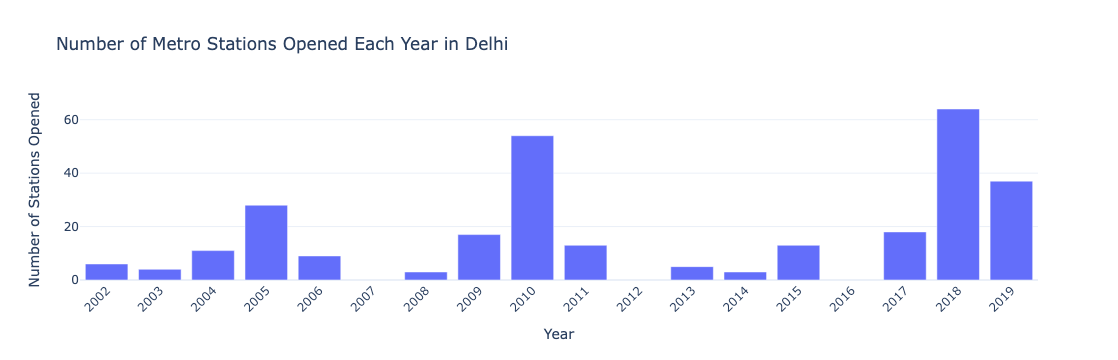

In [26]:
fig = px.bar(stations_per_year_df, x='Year', y='Number of Stations',
             title="Number of Metro Stations Opened Each Year in Delhi",
             labels={'Year': 'Year', 'Number of Stations': 'Number of Stations Opened'})

fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickmode='linear'),
                  yaxis=dict(title='Number of Stations Opened'),
                  xaxis_title="Year")

fig.show()

## Analysis of the various metro lines 

In [28]:
stations_per_line = df['Line'].value_counts()

In [29]:
stations_per_line

Blue line            49
Pink line            38
Yellow line          37
Voilet line          34
Red line             29
Magenta line         25
Aqua line            21
Green line           21
Rapid Metro          11
Blue line branch      8
Orange line           6
Gray line             3
Green line branch     3
Name: Line, dtype: int64

In [30]:
# calculating the total distance of each metro line (max distance from start)
total_distance_per_line = metro_data.groupby('Line')['Distance from Start (km)'].max()

In [31]:
avg_distance_per_line = total_distance_per_line / (stations_per_line - 1)

In [32]:
line_analysis = pd.DataFrame({
    'Line': stations_per_line.index,
    'Number of Stations': stations_per_line.values,
    'Average Distance Between Stations (km)': avg_distance_per_line
})

In [33]:
line_analysis

,Line,Number of Stations,Average Distance Between Stations (km)
Aqua line,Blue line,49,1.355000
Blue line,Pink line,38,1.097917
Blue line branch,Yellow line,37,1.157143
Gray line,Voilet line,34,1.950000
Green line,Red line,29,1.240000
Green line branch,Magenta line,25,1.050000
Magenta line,Aqua line,21,1.379167
Orange line,Green line,21,4.160000
Pink line,Rapid Metro,11,1.421622
Rapid Metro,Blue line branch,8,1.000000


In [34]:
# sorting the DataFrame by the number of stations
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)

In [35]:
line_analysis.reset_index(drop=True, inplace=True)
line_analysis

,Line,Number of Stations,Average Distance Between Stations (km)
0,Blue line,49,1.355000
1,Pink line,38,1.097917
2,Yellow line,37,1.157143
3,Voilet line,34,1.950000
4,Red line,29,1.240000
5,Magenta line,25,1.050000
6,Aqua line,21,1.379167
7,Green line,21,4.160000
8,Rapid Metro,11,1.421622
9,Blue line branch,8,1.000000


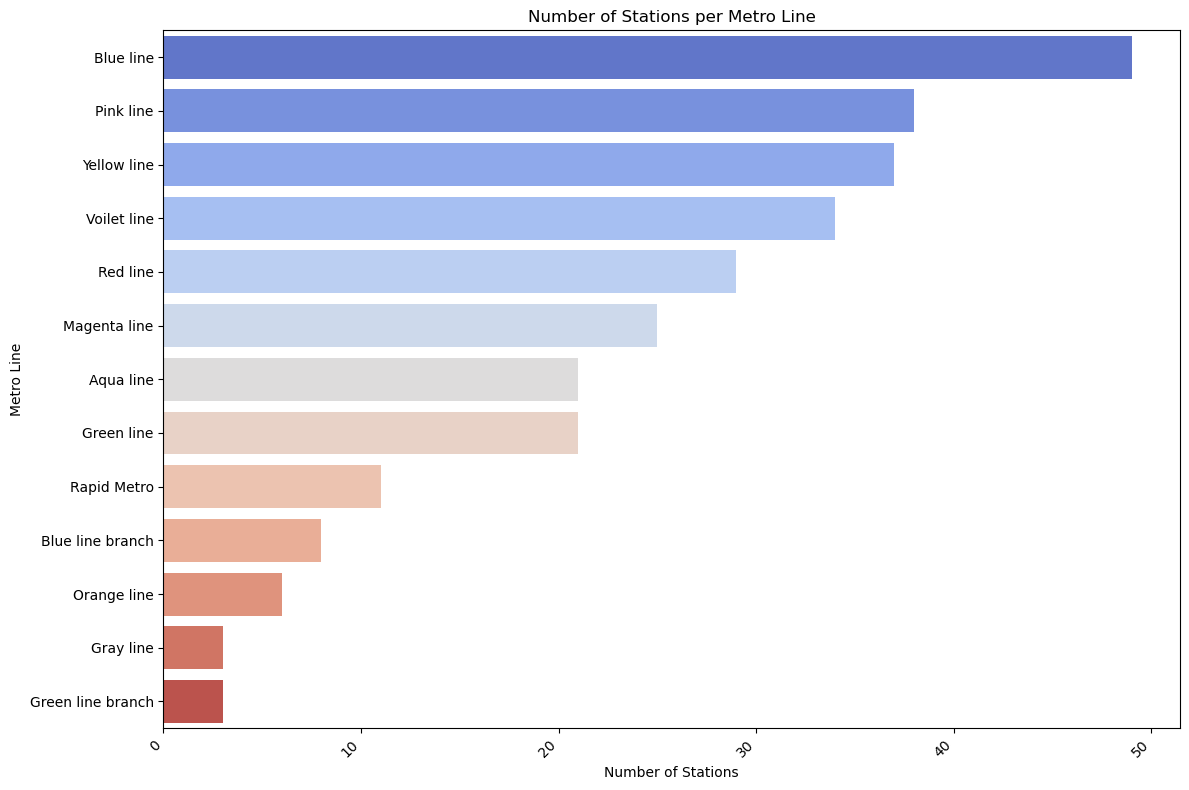

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='Line', x='Number of Stations', data=line_analysis, palette='coolwarm')

# Add title and labels
plt.title('Number of Stations per Metro Line')
plt.ylabel('Metro Line')
plt.xlabel('Number of Stations')
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


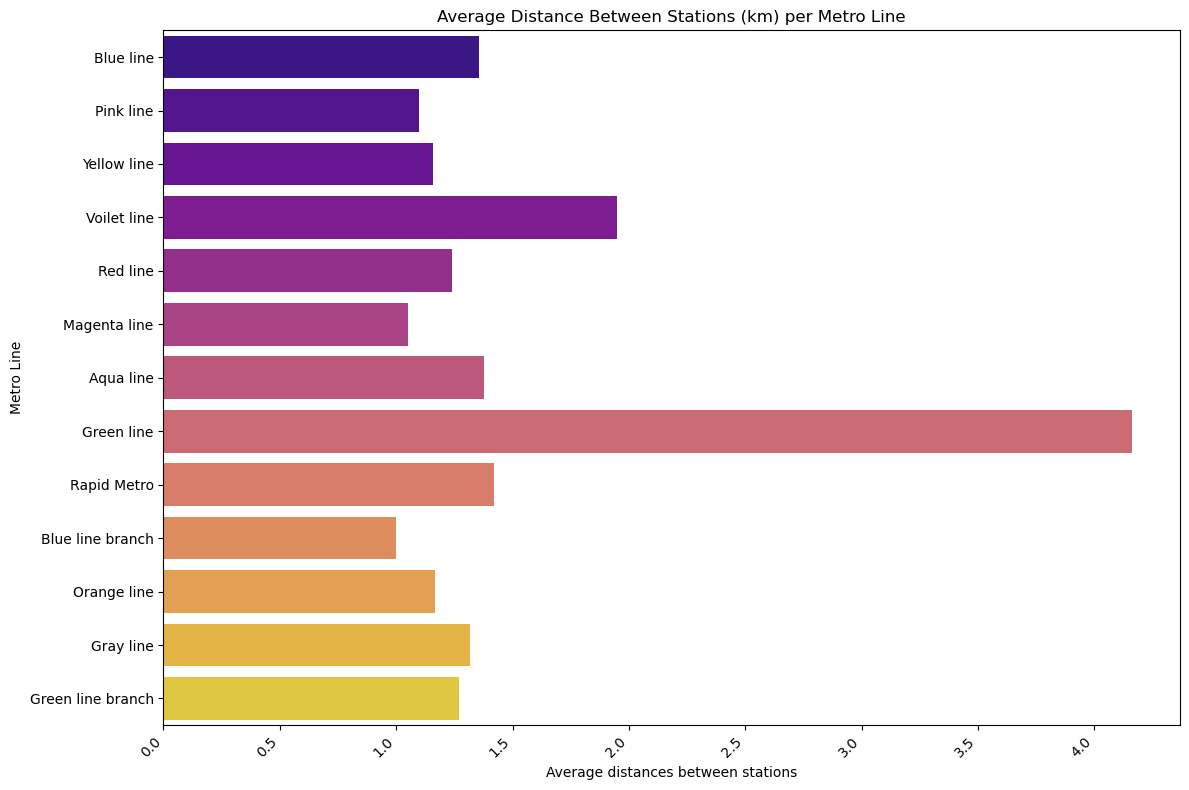

In [47]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='Line', x='Average Distance Between Stations (km)', data=line_analysis, palette='plasma')

# Add title and labels
plt.title('Average Distance Between Stations (km) per Metro Line')
plt.ylabel('Metro Line')
plt.xlabel('Average distances between stations')
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

## Station Layout Analysis

In [49]:
layout_counts = df['Station Layout'].value_counts()

In [50]:
layout_counts

Elevated       214
Underground     68
At-Grade         3
Name: Station Layout, dtype: int64

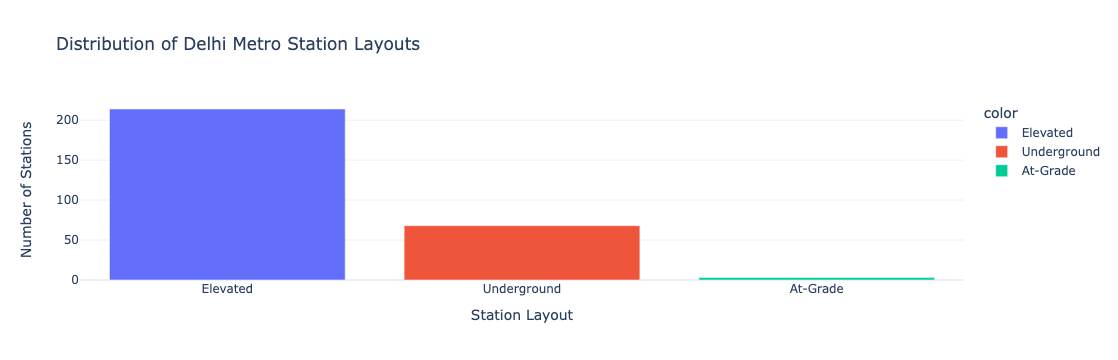

In [51]:
# creating the bar plot using Plotly
fig = px.bar(x=layout_counts.index, y=layout_counts.values,
             labels={'x': 'Station Layout', 'y': 'Number of Stations'},
             title='Distribution of Delhi Metro Station Layouts',
             color=layout_counts.index,
             color_continuous_scale='pastel')

# updating layout for better presentation
fig.update_layout(xaxis_title="Station Layout",
                  yaxis_title="Number of Stations",
                  coloraxis_showscale=False,
                  template="plotly_white")

fig.show()